# Predicting Grant Success: A Multimethod Approach Using TDA, NLP, and Bibliometric Analysis

## Bibliometric Analysis
### Author: Eric Sung

# Import Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score
)
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve
)

from sklearn.inspection import PartialDependenceDisplay

from scipy.stats import pearsonr


# Data Cleaning

## Import Data

In [ ]:
df = pd.read_csv('data/complete_df.csv')

In [3]:
df.head()

,Notice of Opportunity Description,Opportunity,Notice of Opportunity Code,Proposal ID,Proposal Title,Program Announcement Title,Development Proposal ID,Development Proposal ID.1,Proposal Status Description,Lead Investigator Name,...,Total Obligated Amount (Award) ^,Proposal Submitted Date,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Google Affiliation Match,Origin: Google (G) or Semantic (S)
0,-,#N62473-20-2-0017,-,942022,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,42115,42115,Funded,"Pleshet,Noah O.",...,175654.3,9/14/20 0:00,NaN,NaN,NaN,NaN,NaN,NaN,False,S
1,-,#N62473-20-2-0017,-,1005241,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46268,46268,Rejected,"Hopkins,Maren P.",...,0.0,8/18/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S
2,-,#N62473-20-2-0017,-,1008454,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46517,46517,Funded,"Hopkins,Maren P.",...,175654.3,9/7/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S
3,-,-,-,76,Diet Related Wild-Type Mouse Model of Colon Ca...,-,4067,4067,Rejected,"Bernstein,Harris",...,0.0,10/14/10 0:00,53.0,22.0,120.0,45.0,10544.0,2187.0,True,G
4,-,-,-,116,Use of mass-flux measurement and vapor-phase t...,-,141,141,Funded,"Brusseau,Mark L.",...,551567.0,8/4/10 0:00,7.0,7.0,7.0,6.0,363.0,297.0,False,G


In [4]:
len(df)

1678

## Remove Data With No Bibliometric Scores

In [5]:
df_h_index = df.dropna(subset=['h_index'])

In [6]:
df_h_index.head()

,Notice of Opportunity Description,Opportunity,Notice of Opportunity Code,Proposal ID,Proposal Title,Program Announcement Title,Development Proposal ID,Development Proposal ID.1,Proposal Status Description,Lead Investigator Name,...,Total Obligated Amount (Award) ^,Proposal Submitted Date,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Google Affiliation Match,Origin: Google (G) or Semantic (S)
1,-,#N62473-20-2-0017,-,1005241,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46268,46268,Rejected,"Hopkins,Maren P.",...,0.0,8/18/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S
2,-,#N62473-20-2-0017,-,1008454,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46517,46517,Funded,"Hopkins,Maren P.",...,175654.3,9/7/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S
3,-,-,-,76,Diet Related Wild-Type Mouse Model of Colon Ca...,-,4067,4067,Rejected,"Bernstein,Harris",...,0.0,10/14/10 0:00,53.0,22.0,120.0,45.0,10544.0,2187.0,True,G
4,-,-,-,116,Use of mass-flux measurement and vapor-phase t...,-,141,141,Funded,"Brusseau,Mark L.",...,551567.0,8/4/10 0:00,7.0,7.0,7.0,6.0,363.0,297.0,False,G
5,-,-,-,123,The role of IDH mutations in modulating the re...,-,148,148,Withdrawn,"Burd,Randy M.",...,0.0,10/19/10 0:00,45.0,30.0,146.0,108.0,6343.0,3360.0,False,G


In [7]:
len(df_h_index)

1659

## Add Binary Values For Grant Status and Remove Extraneous Grant Status

In [8]:
# Define a mapping for 'Proposal Status Description'
status_mapping = {
    'Funded': 1,
    'Rejected': 0,
    'Withdrawn': np.nan,  # Exclude these
    'Pending': np.nan,    # Exclude these
    'Deactivated': np.nan # Exclude or map to 0 based on dataset context
}

# Apply the mapping
df_h_index.loc[:, 'Proposal_Status_Binary'] = df_h_index['Proposal Status Description'].map(status_mapping)

# Drop rows where Proposal_Status_Binary is NaN
df_cleaned = df_h_index.dropna(subset=['Proposal_Status_Binary']).copy()

# Convert to integer for compatibility
df_cleaned.loc[:, 'Proposal_Status_Binary'] = df_cleaned['Proposal_Status_Binary'].astype(int)


/var/folders/z9/4q0cctmj41d0drmc3j9l61y00000gn/T/ipykernel_27103/316205250.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h_index.loc[:, 'Proposal_Status_Binary'] = df_h_index['Proposal Status Description'].map(status_mapping)


In [9]:
df_cleaned.head()

,Notice of Opportunity Description,Opportunity,Notice of Opportunity Code,Proposal ID,Proposal Title,Program Announcement Title,Development Proposal ID,Development Proposal ID.1,Proposal Status Description,Lead Investigator Name,...,Proposal Submitted Date,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Google Affiliation Match,Origin: Google (G) or Semantic (S),Proposal_Status_Binary
1,-,#N62473-20-2-0017,-,1005241,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46268,46268,Rejected,"Hopkins,Maren P.",...,8/18/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S,0.0
2,-,#N62473-20-2-0017,-,1008454,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46517,46517,Funded,"Hopkins,Maren P.",...,9/7/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S,1.0
3,-,-,-,76,Diet Related Wild-Type Mouse Model of Colon Ca...,-,4067,4067,Rejected,"Bernstein,Harris",...,10/14/10 0:00,53.0,22.0,120.0,45.0,10544.0,2187.0,True,G,0.0
4,-,-,-,116,Use of mass-flux measurement and vapor-phase t...,-,141,141,Funded,"Brusseau,Mark L.",...,8/4/10 0:00,7.0,7.0,7.0,6.0,363.0,297.0,False,G,1.0
8,-,-,-,197,Hybrid communication systems laboratory,-,223,223,Rejected,"Djordjevic,Ivan B.",...,9/14/10 0:00,59.0,36.0,272.0,130.0,13923.0,5298.0,True,G,0.0


In [10]:
len(df_cleaned)

1204

## Split Data into Google and Semantic Scholar Data

In [11]:
df_google = df_cleaned[df_cleaned['Origin: Google (G) or Semantic (S)']=='G']
df_ss = df_cleaned[df_cleaned['Origin: Google (G) or Semantic (S)']=='S']

In [12]:
df_google.head()

,Notice of Opportunity Description,Opportunity,Notice of Opportunity Code,Proposal ID,Proposal Title,Program Announcement Title,Development Proposal ID,Development Proposal ID.1,Proposal Status Description,Lead Investigator Name,...,Proposal Submitted Date,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Google Affiliation Match,Origin: Google (G) or Semantic (S),Proposal_Status_Binary
3,-,-,-,76,Diet Related Wild-Type Mouse Model of Colon Ca...,-,4067,4067,Rejected,"Bernstein,Harris",...,10/14/10 0:00,53.0,22.0,120.0,45.0,10544.0,2187.0,True,G,0.0
4,-,-,-,116,Use of mass-flux measurement and vapor-phase t...,-,141,141,Funded,"Brusseau,Mark L.",...,8/4/10 0:00,7.0,7.0,7.0,6.0,363.0,297.0,False,G,1.0
8,-,-,-,197,Hybrid communication systems laboratory,-,223,223,Rejected,"Djordjevic,Ivan B.",...,9/14/10 0:00,59.0,36.0,272.0,130.0,13923.0,5298.0,True,G,0.0
11,-,-,-,227,A Counterflow Virtual Impactor Inlet System fo...,-,253,253,Funded,"Sorooshian,Armin",...,9/10/10 0:00,66.0,51.0,202.0,197.0,14136.0,8890.0,True,G,1.0
12,-,-,-,258,Equipment for efficient code development and p...,-,287,287,Rejected,"Fasel,Hermann F.",...,9/14/10 0:00,43.0,31.0,181.0,90.0,8890.0,3674.0,True,G,0.0


In [13]:
df_ss.head()

,Notice of Opportunity Description,Opportunity,Notice of Opportunity Code,Proposal ID,Proposal Title,Program Announcement Title,Development Proposal ID,Development Proposal ID.1,Proposal Status Description,Lead Investigator Name,...,Proposal Submitted Date,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Google Affiliation Match,Origin: Google (G) or Semantic (S),Proposal_Status_Binary
1,-,#N62473-20-2-0017,-,1005241,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46268,46268,Rejected,"Hopkins,Maren P.",...,8/18/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S,0.0
2,-,#N62473-20-2-0017,-,1008454,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46517,46517,Funded,"Hopkins,Maren P.",...,9/7/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S,1.0
22,-,-,-,495,Visible/NIR/SIWR Imaging Mueller Matrix Polari...,-,537,537,Funded,"Tyo,J. Scott",...,9/14/10 0:00,16.0,NaN,NaN,NaN,698.0,NaN,NaN,S,1.0
27,-,-,-,774,Equipment for Experiments on Filament-Assisted...,-,833,833,Funded,"Polynkin,Pavel G.",...,9/14/10 0:00,27.0,NaN,NaN,NaN,3448.0,NaN,NaN,S,1.0
44,-,-,-,1279,Creating Extended and Dense Plasma Channels in...,-,1465,1465,Funded,"Polynkin,Pavel G.",...,7/19/10 0:00,27.0,NaN,NaN,NaN,3448.0,NaN,NaN,S,1.0


In [14]:
len(df_cleaned), len(df_google), len(df_ss)

(1204, 1044, 160)

In [15]:
print(f"Percent of total data from Google Scholar: {(len(df_google) / len(df_cleaned)) * 100: .3f}%")
print(f"Percent of total data from Semantic Scholar: {(len(df_ss) / len(df_cleaned)) * 100: .3f}%")

Percent of total data from Google Scholar:  86.711%
Percent of total data from Semantic Scholar:  13.289%


Since the Google Scholar data is already more accurate than the Semantic Scholar data and accounts for most of our total data, we elect to use the Google Scholar data for our analysis.

# Predictive Models

## Logistic Model

### Introduction

Due to the binary nature of our data, we first employ a simple logistic regression model to probe the relationships within the dataset. The primary goal here is not to maximize accuracy but to gain an initial understanding of how the features interact with the target variable. This foundational analysis will guide the development of more sophisticated models in subsequent sections.


### Relationship Between Individual Predictors and Grant Approval

#### Visualizing Relationships Between Predictors and Grant Approval

To explore the relationship between bibliometric predictors and grant approval probabilities, logistic regression models were applied individually to six features:
1. **h-index**
2. **h-index Since 2019**
3. **i10-index**
4. **i10-index Since 2019**
5. **Total Citations**
6. **Total Citations Since 2019**

#### Methodology:
- For each predictor, we fit a **logistic regression** model, treating the predictor as the independent variable and the grant approval status (binary: 1 = Accepted, 0 = Rejected) as the dependent variable.
- A scatterplot of the predictor against the approval status is plotted alongside the logistic regression curve, showing how the probability of grant approval changes with each predictor.



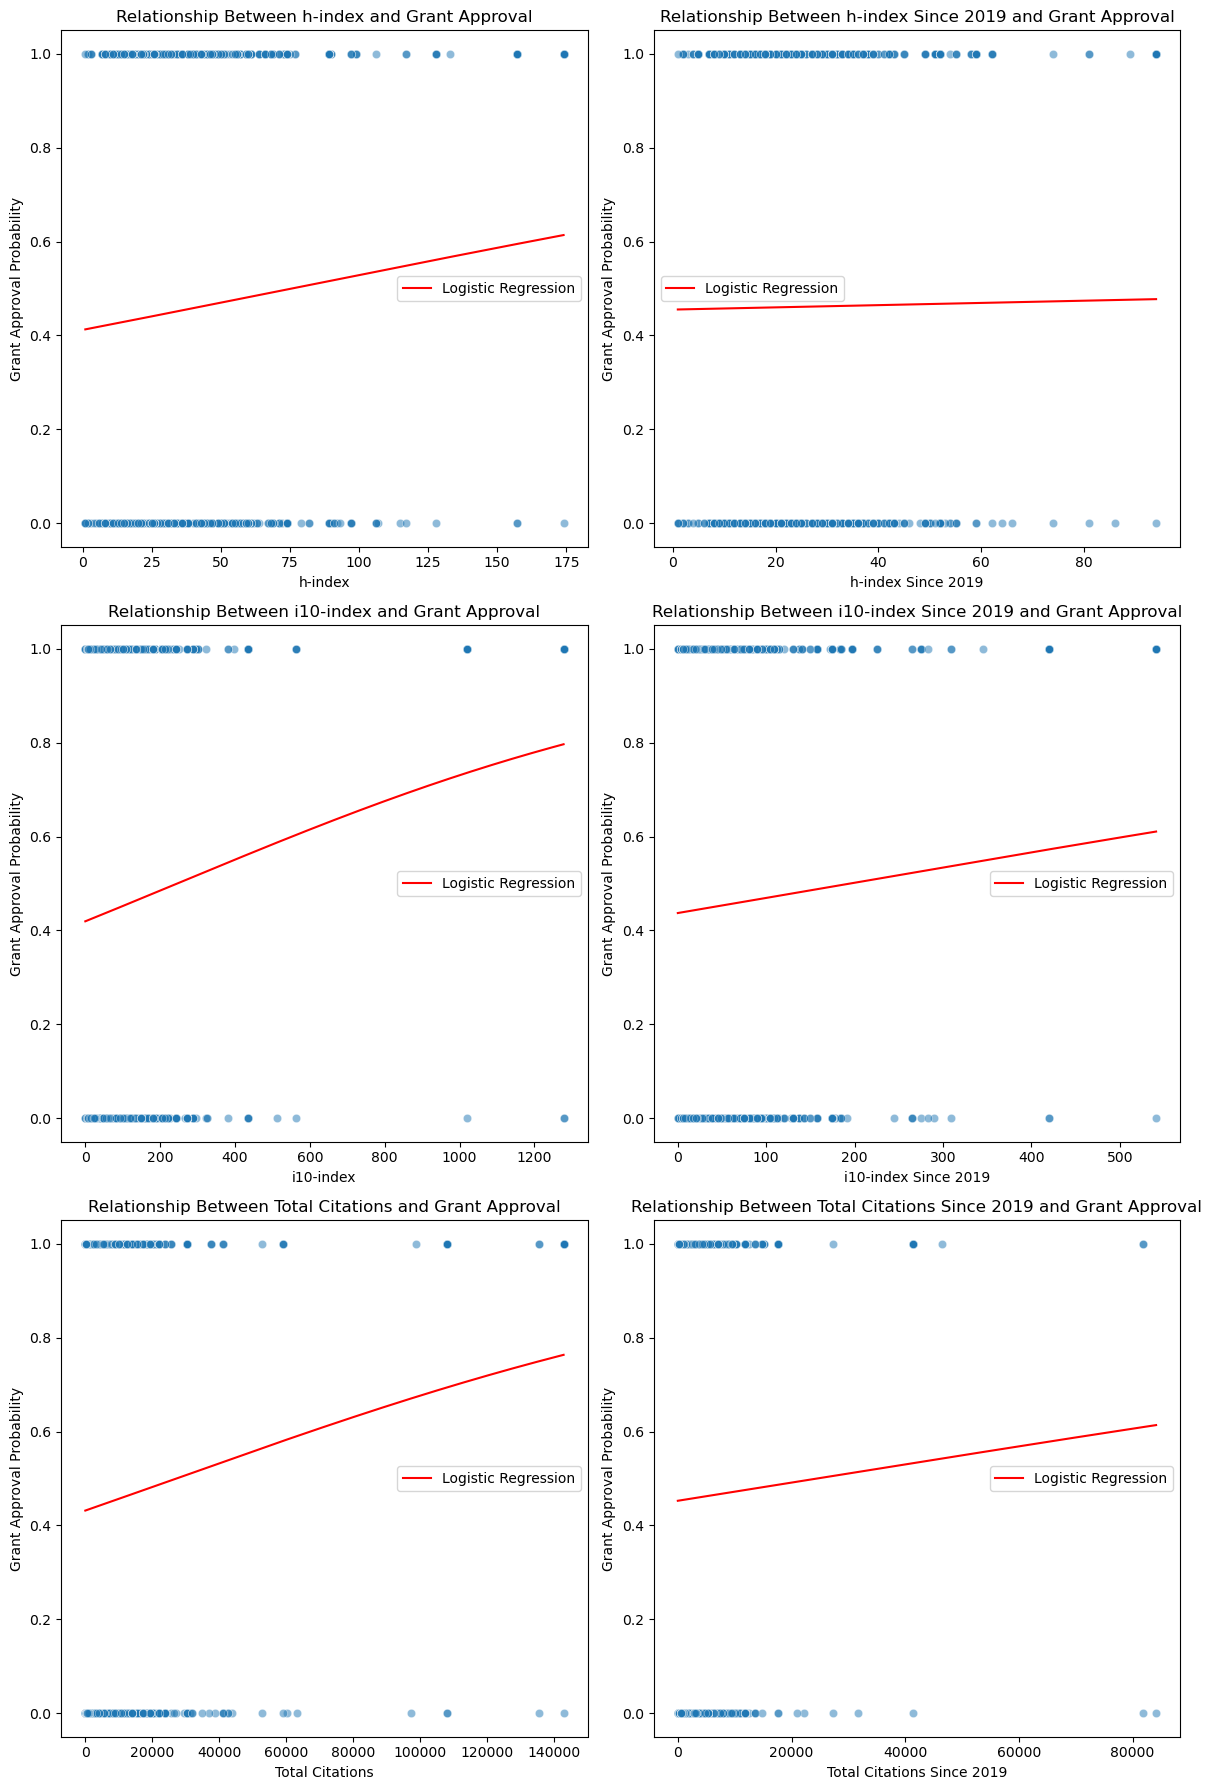

In [16]:
# Prepare a list of predictors and titles
predictors = [
    ('h_index', 'h-index'),
    ('h_index_recent (Since 2019)', 'h-index Since 2019'),
    ('i10_index', 'i10-index'),
    ('i10_index_recent (Since 2019)', 'i10-index Since 2019'),
    ('total_citations', 'Total Citations'),
    ('recent_citations (Since 2019)', 'Total Citations Since 2019')
]

# Set up a 3x2 grid for plots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.flatten()

# Perform analysis and plot for each predictor
for i, (feature, title) in enumerate(predictors):
    # Prepare the data
    X = df_google[feature].dropna().values.reshape(-1, 1)
    y = df_google.loc[df_google[feature].notna(), 'Proposal_Status_Binary'].values

    # Fit logistic regression
    log_reg = LogisticRegression()
    log_reg.fit(X, y)

    # Generate predictions for logistic regression line
    x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred = log_reg.predict_proba(x_range)[:, 1]  # Probability for class 1

    # Scatterplot and regression line
    sns.scatterplot(
        x=feature, y='Proposal_Status_Binary',
        data=df_google, alpha=0.5, ax=axes[i]
    )
    axes[i].plot(x_range, y_pred, color='red', label='Logistic Regression')
    axes[i].set_title(f'Relationship Between {title} and Grant Approval')
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Grant Approval Probability')
    axes[i].legend()

# Adjust layout and display the grid of plots
plt.tight_layout()
plt.show()


#### Observations:
- **h-index** and **i10-index** exhibit upward trends, suggesting a positive correlation with grant approval probabilities.
- **h-index Since 2019** and **i10-index Since 2019** show weaker relationships, indicating their minimal influence.
- **Total Citations** shows a clear upward trend but also highlights diminishing returns at extremely high citation counts.
- **Total Citations Since 2019** demonstrates a weaker trend compared to total lifetime citations.

These findings establish a preliminary understanding of feature importance and suggest that i10-index and total citations are stronger predictors than their recent counterparts.

#### Next Steps:
The findings from these plots set the stage for building a multivariate logistic regression model to evaluate the combined influence of predictors on grant approval probability.


### Correlation Analysis of Bibliometric Predictors

To evaluate the linear relationships between individual bibliometric predictors and grant approval outcomes, we computed the **Pearson correlation coefficients**. This analysis helps quantify how strongly each predictor correlates with the probability of grant approval.


#### Methodology
- We used **Pearson correlation** to measure the strength of the relationship between each predictor and the binary grant approval status.
- Six predictors were analyzed:
   - **h-index**
   - **h-index Since 2019**
   - **i10-index**
   - **i10-index Since 2019**
   - **Total Citations**
   - **Total Citations Since 2019**
- A corresponding **p-value** was calculated for each correlation to assess statistical significance.


In [17]:
# Define the list of predictors and titles
predictors = [
    ('h_index', 'h-index'),
    ('h_index_recent (Since 2019)', 'h-index Since 2019'),
    ('i10_index', 'i10-index'),
    ('i10_index_recent (Since 2019)', 'i10-index Since 2019'),
    ('total_citations', 'Total Citations'),
    ('recent_citations (Since 2019)', 'Total Citations Since 2019')
]

# Initialize a dictionary to store results
correlation_results = {}

# Calculate Pearson correlation for each predictor
for feature, title in predictors:
    # Drop missing values
    df_subset = df_google.dropna(subset=[feature, 'Proposal_Status_Binary'])
    X = df_subset[feature]
    y = df_subset['Proposal_Status_Binary']

    # Calculate correlation and p-value
    correlation, p_value = pearsonr(X, y)
    correlation_results[title] = (correlation, p_value)

# Print the results
print("Correlation Results:")
for title, (corr, p_val) in correlation_results.items():
    print(f"{title}: Correlation = {corr:.3f}, p-value = {p_val:.3e}")


Correlation Results:
h-index: Correlation = 0.067, p-value = 2.999e-02
h-index Since 2019: Correlation = 0.007, p-value = 8.182e-01
i10-index: Correlation = 0.103, p-value = 8.184e-04
i10-index Since 2019: Correlation = 0.051, p-value = 9.754e-02
Total Citations: Correlation = 0.092, p-value = 2.851e-03
Total Citations Since 2019: Correlation = 0.028, p-value = 3.666e-01


#### Key Insights
The analysis reveals the following key findings:
- **i10-index** and **Total Citations** demonstrate the **strongest positive correlations** with grant approval status, with correlation coefficients around **0.1**. Both relationships are **statistically significant** (p-values < 0.05).
- **Recent bibliometric scores** (e.g., **h-index Since 2019** and **i10-index Since 2019**) exhibit much weaker correlations and are **not statistically significant**. This suggests that recent performance metrics play a minimal role in grant decisions.
- The **h-index** shows a weak but significant correlation, while its recent counterpart provides no predictive value.

These results highlight the greater importance of **long-term bibliometric performance** compared to recent productivity. Specifically, **i10-index** and **Total Citations** emerge as the most influential predictors, though their correlations remain weak. This suggests the need for more advanced models to capture non-linear relationships and predictor interactions.

#### Next Steps
Building on these findings, we proceed to develop a **multivariate logistic regression model** that incorporates all predictors to analyze their combined influence on grant approval probabilities.

### Fitting the Multivariate Logistic Regression Model

To analyze the combined influence of multiple predictors on grant approval, we fit a **multivariate logistic regression model**. The predictors included in the model are:
1. **h-index**
2. **i10-index**
3. **Total Citations**

This step allows us to estimate how each predictor contributes to the likelihood of grant approval while controlling for the others.


In [18]:
# Define predictors and target variable
predictors = ['h_index', 'i10_index', 'total_citations']
X = df_google[predictors].dropna()
y = df_google.loc[X.index, 'Proposal_Status_Binary']

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Print coefficients
print("Coefficients:", dict(zip(predictors, log_reg.coef_[0])))
print("Intercept:", log_reg.intercept_[0])

# Predict probabilities and evaluate
y_pred_probs = log_reg.predict_proba(X)[:, 1]
auc = roc_auc_score(y, y_pred_probs)
accuracy = accuracy_score(y, log_reg.predict(X))

print(f"AUC-ROC: {auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")


Coefficients: {'h_index': -0.012198096740219069, 'i10_index': 0.0026275922639690022, 'total_citations': 7.343205234786884e-06}
Intercept: -0.05510975992878368
AUC-ROC: 0.570
Accuracy: 0.539


#### Results
1. **Model Coefficients**:
   - h-index: -0.012 (negative effect)
   - i10-index: 0.0026  
     (positive effect)
   - Total Citations: $7.34 \times 10^{-6}$ (negligible)

2. **Intercept**: -0.055   

3. **Performance Metrics**:
   - **AUC-ROC**: 0.570  
     Indicates the model has a weak ability to distinguish between funded and rejected proposals.
   - **Accuracy**: 53.9%
     Close to random guessing, further confirming that this simple model does not effectively capture the complexity of the relationships.


#### Observations
- The model suggests that **i10-index** has the strongest positive contribution to grant approval likelihood among the predictors, albeit with a small effect size.
- **h-index** appears to have a slightly negative relationship, which could indicate collinearity or diminishing returns for this metric.
- The overall performance metrics (AUC-ROC and accuracy) are low, suggesting that logistic regression struggles to model the complexity of the data. This aligns with earlier findings of weak correlations and motivates the use of more advanced models like Random Forest and Gradient Boosting.


### Feature Importance in Logistic Regression

To understand the relative contribution of each predictor in the logistic regression model, we analyzed the absolute values of the regression coefficients as a measure of feature importance. The features **h-index**, **i10-index**, and **total citations** were evaluated.


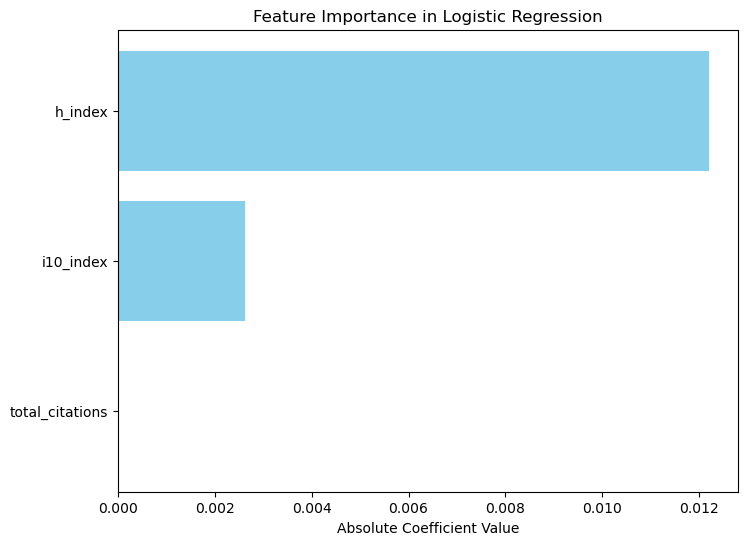

In [19]:
# Extract feature importance (coefficients)
feature_importance = np.abs(log_reg.coef_[0])  # Take the absolute values for importance
features = predictors  # Feature names

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Ensure the most important feature is at the top
plt.show()


**Observations**:
- **h-index** emerged as the most important predictor, exhibiting the largest absolute coefficient.
- **i10-index** provided a smaller but notable contribution.
- **Total Citations** had a negligible impact, indicating that citation counts alone do not significantly influence grant approval probabilities.

This analysis suggests that while bibliometric metrics like the h-index provide some predictive value, their overall impact is weak, as seen in the model's limited performance.

#### ROC Curve for Logistic Regression

We use the **Receiver Operating Characteristic (ROC) curve** for evaluating the performance for our binary classification models.


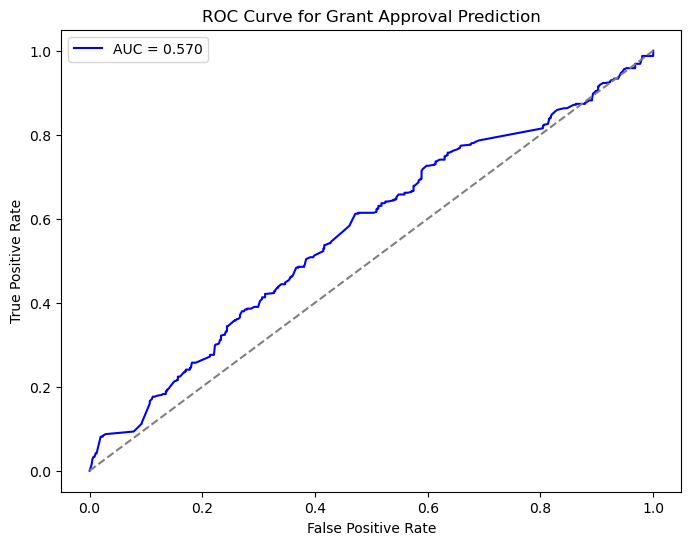

In [20]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Grant Approval Prediction')
plt.legend()
plt.show()


#### ROC Curve and Logistic Regression Summary

The model achieved an **AUC-ROC** of **0.570**, which is only marginally better than random guessing (AUC = 0.5). The ROC curve remains close to the diagonal line, representing poor discriminative ability.

**Logistic Regression Summary**:
- **AUC-ROC**: 0.570  
- **Accuracy**: 0.539  
- **Feature Importance**:  
   - **h-index**: Largest positive contribution to grant approval prediction in the model.  
   - **i10-index**: Second largest contributor.  
   - **Total Citations**: Negligible impact in the logistic regression model.  

**Key Insights**:
- Despite earlier correlation analysis identifying **i10-index** and **Total Citations** as having the strongest positive linear relationships with grant approval, their predictive contributions in the logistic regression model appear less impactful.  
- The **h-index**, which had a weaker correlation, contributes the most to predictions when all features are included.  
- The low **AUC-ROC** and significant overlap in predicted probabilities for accepted and rejected grants highlight the limitations of logistic regression for this dataset.  
- This suggests that bibliometric features alone cannot sufficiently predict grant outcomes and that more complex or non-linear models may be required to capture the relationships effectively.  


#### Residual Analysis and Predicted Probability Distribution

Residuals were calculated as the difference between the true grant approval status (0 or 1) and the predicted probabilities from the logistic regression model.

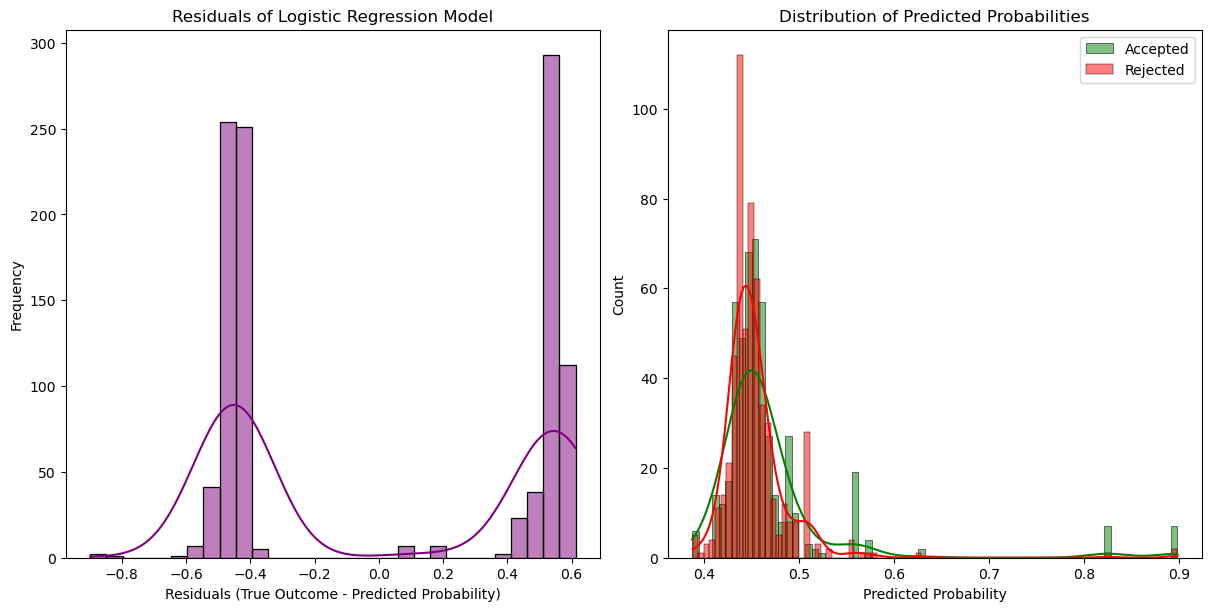

In [ ]:
# Generate predicted probabilities
y_pred_probs = log_reg.predict_proba(X)[:, 1]

# Residuals (difference between true and predicted outcomes)
residuals = y - y_pred_probs

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# --- 1. Residual Plot ---
sns.histplot(residuals, bins=30, kde=True, color='purple', ax=axes[0])
axes[0].set_title("Residuals of Logistic Regression Model")
axes[0].set_xlabel("Residuals (True Outcome - Predicted Probability)")
axes[0].set_ylabel("Frequency")

# --- 2. Predicted Probability Distribution ---
sns.histplot(y_pred_probs[y == 1], color='green', label="Accepted", kde=True, ax=axes[1])
sns.histplot(y_pred_probs[y == 0], color='red', label="Rejected", kde=True, ax=axes[1])
axes[1].set_title("Distribution of Predicted Probabilities")
axes[1].set_xlabel("Predicted Probability")
axes[1].legend()

# Save the figure as PDF optimized for Overleaf
plt.savefig("images/logistic_regression_plots.pdf", format='pdf', bbox_inches='tight')

# Show the figure
plt.show()


**Residual Analysis**:  
- The residuals exhibit a **bimodal distribution**, with two distinct peaks. This pattern indicates that the model struggles to predict probabilities accurately, frequently **overestimating** or **underestimating** outcomes.  
- The presence of large residuals confirms that the logistic regression model lacks the complexity to capture the variability in grant approvals.

**Predicted Probability Distribution**:  
- The distribution of predicted probabilities was visualized for both **accepted** and **rejected** grants.  
- **Key Observations**:
  - There is significant **overlap** between the predicted probabilities for accepted and rejected grants.  
  - Most predicted probabilities cluster around the 0.4–0.5 range, reflecting the model's lack of confidence in its predictions.  
- This overlap demonstrates the model’s poor ability to separate the two classes effectively.

---

#### Key Insights:
1. **Residuals**: The bimodal nature of residuals indicates systemic prediction errors, suggesting that the model struggles to align predictions with true outcomes.  
2. **Overlap in Predicted Probabilities**: The logistic regression model fails to produce clear separations between classes, as evidenced by overlapping distributions.  
3. **Predictive Power**: The model’s weak performance highlights the inadequacy of bibliometric features alone in predicting grant approvals.  

---

#### Conclusion

The logistic regression model was evaluated using bibliometric predictors (**h-index**, **i10-index**, and **total citations**) to predict grant approvals. The model demonstrated **weak predictive performance**, with an **AUC-ROC of 0.570** and an **accuracy of 53.9%**. Key findings include:

1. **Residual Analysis**:  
   - The bimodal nature of residuals indicates systemic prediction errors, suggesting that the model struggles to align predictions with true outcomes.  

2. **Predicted Probabilities**:  
   - The distributions show substantial overlap between accepted and rejected grants, reflecting the model’s inability to confidently differentiate the two classes.  

3. **Feature Contributions**:  
   - Feature importance analysis revealed that the **h-index** had the largest contribution, followed by the **i10-index**, while **total citations** had minimal impact.

**Overall**, these results suggest that logistic regression, while a useful baseline, lacks the complexity to model the relationships effectively. More robust models, such as **Random Forest** or **Gradient Boosting**, and the inclusion of additional features may be necessary to improve prediction accuracy and reduce residual errors.


## Random Forest

### Introduction

We implemented a **Random Forest** model to predict grant approval status using bibliometric features. This model was selected for its ability to capture complex relationships and feature interactions while handling non-linearities effectively.

The analysis proceeded in three main phases:
1. **Initial Model Training**: Evaluating performance using a subset of features.
2. **Hyperparameter Tuning**: Optimizing model performance through Grid Search.
3. **Full Feature Analysis**: Expanding the feature set to assess its impact on performance.


### Initial Random Forest Model with Selected Features

To begin our analysis, we implemented a **Random Forest** model using three key predictors identified from earlier analyses:  
1. **h-index**  
2. **i10-index**  
3. **Total Citations**  

The data was split into training and testing sets using an **80-20 split**, ensuring that the class distributions were stratified.

#### Methodology:
- A **Random Forest Classifier** with 100 trees (`n_estimators=100`) and a fixed random state for reproducibility was trained on the selected predictors.
- The model's performance was evaluated using **AUC-ROC** and **accuracy** on the test set.
- A **confusion matrix** was generated to visualize the classification results, highlighting correct and incorrect predictions.

Random Forest AUC-ROC: 0.754
Random Forest Accuracy: 0.684


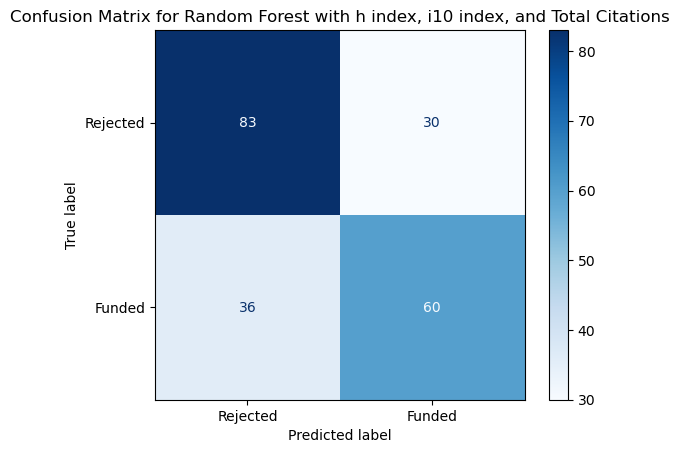

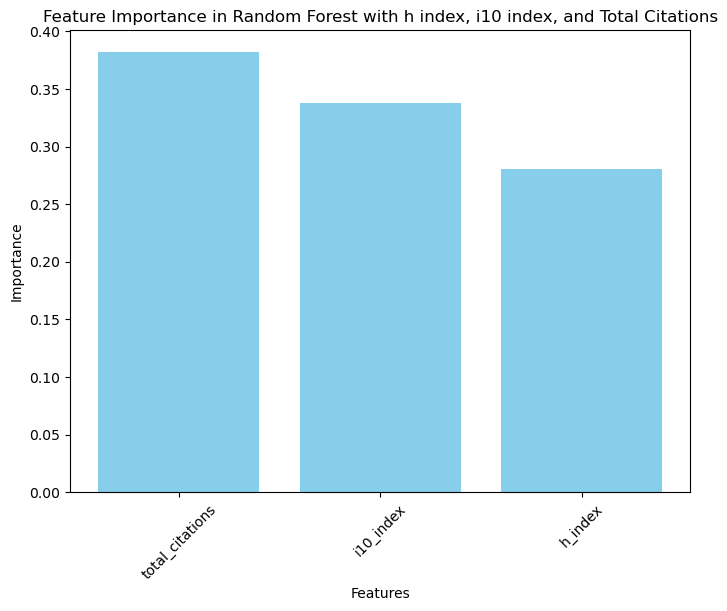

In [22]:
predictors = ['h_index', 'i10_index', 'total_citations']

# Define predictors and target variable
X = df_google[predictors].dropna()
y = df_google.loc[X.index, 'Proposal_Status_Binary']

# Split into train-test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_probs = rf_model.predict_proba(X_test)[:, 1]
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
auc = roc_auc_score(y_test, y_pred_probs)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Random Forest AUC-ROC: {auc:.3f}")
print(f"Random Forest Accuracy: {accuracy:.3f}")

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Rejected', 'Funded'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest with h index, i10 index, and Total Citations")
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.title("Feature Importance in Random Forest with h index, i10 index, and Total Citations")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='skyblue')
plt.xticks(range(X.shape[1]), [predictors[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


#### Results:
- **AUC-ROC**: 0.754  
- **Accuracy**: 68.4%  

The model demonstrated moderate performance, with an AUC-ROC of 0.754 indicating a reasonable ability to distinguish between funded and rejected grants. The accuracy of 68.4% reflects a substantial improvement over the logistic regression baseline.

#### Confusion Matrix:
The confusion matrix provides further insights into the model’s predictions:  
- **True Positives** (Correctly predicted funded grants): 60  
- **True Negatives** (Correctly predicted rejected grants): 83  
- **False Positives**: 30  
- **False Negatives**: 36  

While the model performs well in predicting rejected grants, there is room for improvement in reducing false negatives to better identify funded proposals.

The results from this initial model set the stage for further improvements through **hyperparameter tuning** and the inclusion of additional predictors.


### Hyperparameter Tuning Using Grid Search

To optimize the performance of the Random Forest model, we employed **Grid Search** with **5-fold cross-validation** to identify the best combination of hyperparameters. Grid Search systematically evaluates multiple configurations to improve model accuracy and generalization.

#### Methodology:
The following hyperparameters were tuned:
- **`n_estimators`**: Number of trees in the forest $[100, 200, 300]$
- **`max_depth`**: Maximum depth of each tree $[None, 10, 20, 30]$
- **`min_samples_split`**: Minimum samples required to split an internal node $[2, 5, 10]$
- **`min_samples_leaf`**: Minimum samples required to form a leaf node $[1, 2, 4]$

The Grid Search optimized the model based on the **AUC-ROC** metric, ensuring that the best estimator maximized the model’s ability to differentiate between accepted and rejected grant proposals.

In [23]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=0, n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_three = grid_search.best_estimator_
y_pred_probs = best_rf_three.predict_proba(X_test)[:, 1]
y_pred = best_rf_three.predict(X_test)

auc = roc_auc_score(y_test, y_pred_probs)
accuracy = accuracy_score(y_test, y_pred)

print(f"Optimized Random Forest AUC-ROC (three features): {auc:.3f}")
print(f"Optimized Random Forest Accuracy (three features): {accuracy:.3f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Optimized Random Forest AUC-ROC (three features): 0.745
Optimized Random Forest Accuracy (three features): 0.713


#### Results:
The best combination of hyperparameters was:  
- **`n_estimators`**: 200  
- **`max_depth`**: 10  
- **`min_samples_split`**: 5  
- **`min_samples_leaf`**: 1  

The optimized model was evaluated on the test set, yielding the following performance:  
- **AUC-ROC**: 0.745  
- **Accuracy**: 71.3%  

#### Key Insights:
The optimized model achieved a slight reduction in AUC-ROC compared to the untuned version (from 0.754 to 0.745) but showed a noticeable improvement in accuracy (from 68.4% to 71.3%). This tradeoff reflects a more balanced model that generalizes better to unseen data.

These results highlight the effectiveness of hyperparameter tuning in improving the model's predictive performance. The optimized model will now serve as the foundation for further evaluations, including feature importance analysis and validation.


### Random Forest with Full Feature Set

To explore the impact of including **all bibliometric features**, we expanded the feature set to incorporate recent metrics (`h-index Since 2019`, `i10-index Since 2019`, and `Total Citations Since 2019`) alongside the original predictors (`h-index`, `i10-index`, and `Total Citations`).

#### Methodology:
- The full feature set included six predictors:
  - **h-index**
  - **h-index Since 2019**
  - **i10-index**
  - **i10-index Since 2019**
  - **Total Citations**
  - **Total Citations Since 2019**
- A **Random Forest model** was trained and evaluated using the same 80-20 train-test split.


Random Forest AUC-ROC: 0.741
Random Forest Accuracy: 0.670


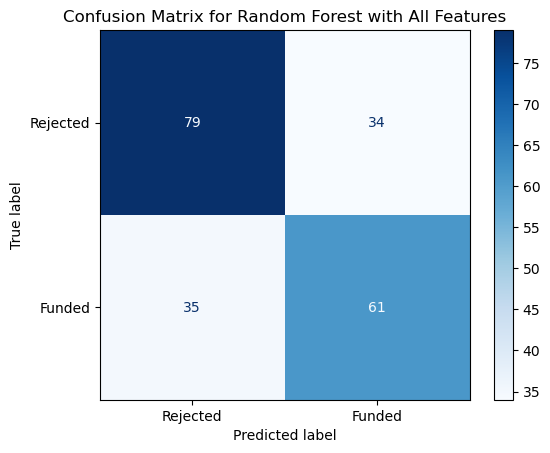

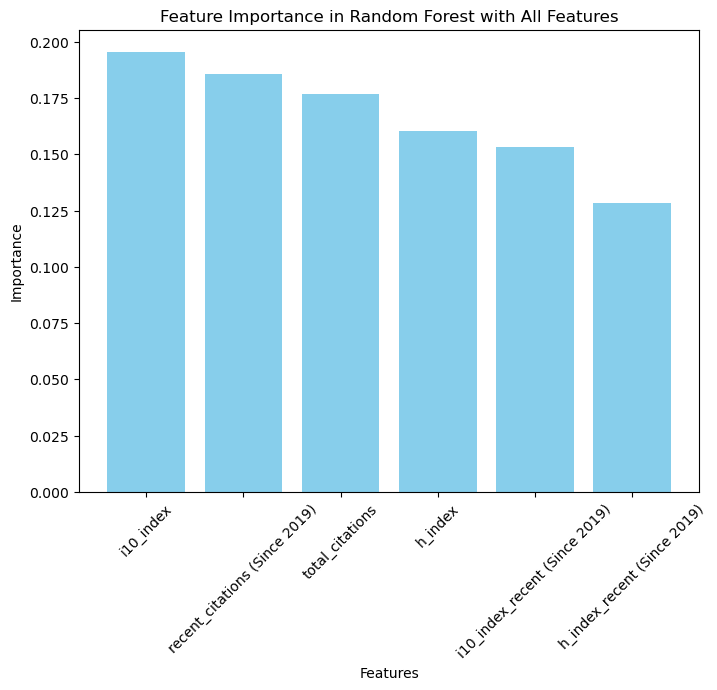

In [24]:
# Updated predictors to include 'since 2019' features
predictors = [
    'h_index', 'h_index_recent (Since 2019)',
    'i10_index', 'i10_index_recent (Since 2019)',
    'total_citations', 'recent_citations (Since 2019)'
]

# predictors = ['h_index', 'i10_index', 'total_citations']


# Define predictors and target variable
X = df_google[predictors].dropna()
y = df_google.loc[X.index, 'Proposal_Status_Binary']

# Split into train-test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_probs = rf_model.predict_proba(X_test)[:, 1]
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
auc = roc_auc_score(y_test, y_pred_probs)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Random Forest AUC-ROC: {auc:.3f}")
print(f"Random Forest Accuracy: {accuracy:.3f}")

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Rejected', 'Funded'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest with All Features")
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.title("Feature Importance in Random Forest with All Features")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='skyblue')
plt.xticks(range(X.shape[1]), [predictors[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [25]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=0, n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_all = grid_search.best_estimator_
y_pred_probs = best_rf_all.predict_proba(X_test)[:, 1]
y_pred = best_rf_all.predict(X_test)

auc = roc_auc_score(y_test, y_pred_probs)
accuracy = accuracy_score(y_test, y_pred)

print(f"Optimized Random Forest AUC-ROC (all features): {auc:.3f}")
print(f"Optimized Random Forest Accuracy (all features): {accuracy:.3f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest AUC-ROC (all features): 0.741
Optimized Random Forest Accuracy (all features): 0.670


#### Results:
The model's performance on the test set is as follows:  
- **AUC-ROC**: 0.741  
- **Accuracy**: 67.0%  

#### Observations:
1. **Performance Comparison**:  
   Including all features led to a slight **decrease** in both AUC-ROC and accuracy compared to the optimized model with the original three features:
   - AUC-ROC dropped from **0.745** to **0.741**.
   - Accuracy decreased from **71.3%** to **67.0%**.  
   This suggests that the additional "recent" metrics may introduce noise rather than useful information.

2. **Feature Importance**:  
   - The expanded feature set revealed that the **i10-index** remained the most influential predictor.
   - **Recent metrics** like `recent_citations (Since 2019)` contributed moderately but failed to surpass the importance of established predictors like `i10-index` and `Total Citations`.  
   - **h-index Since 2019** demonstrated the least importance, aligning with earlier findings that recent metrics have weaker correlations with grant approval.

3. **Confusion Matrix**:  
   The confusion matrix for the full feature set showed a slightly higher misclassification rate, particularly for rejected proposals.

#### Key Insights:
Including additional features, such as recent bibliometric scores, did not improve model performance. In fact, the results indicate that these features may introduce noise and reduce the model’s ability to generalize.  

**Conclusion**:  
The original feature set (`h-index`, `i10-index`, and `Total Citations`) remains the preferred configuration, offering the best balance between performance and simplicity. The findings emphasize the importance of long-term bibliometric metrics over recent ones in predicting grant approval.  


### Partial Dependence Analysis

To better understand how individual bibliometric predictors influence the predicted probability of grant approval, we conducted a **Partial Dependence Analysis**. This method visualizes the marginal effect of each feature on the model’s predictions while holding all other features constant.

#### Methodology
- We generated **Partial Dependence Plots (PDPs)** for the following predictors:
  1. **h-index**
  2. **i10-index**
  3. **Total Citations**
- The partial dependence plots were created using the **optimized Random Forest model** with the original three features: `h-index`, `i10-index`, and `total_citations`.


In [24]:
best_rf = best_rf_three

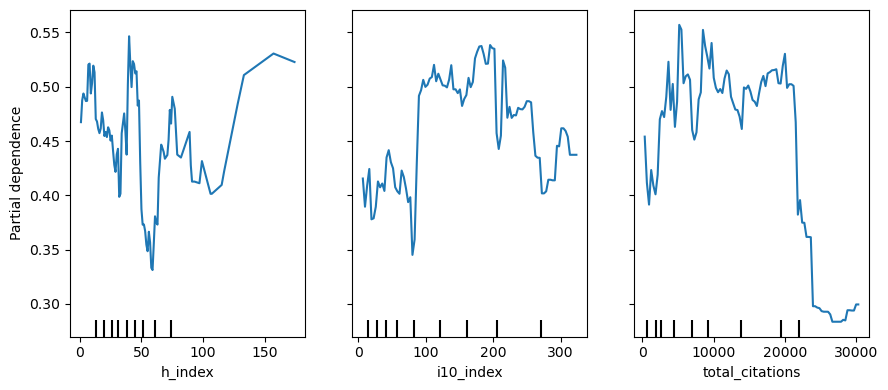

In [ ]:
# Generate Partial Dependence Plot
fig, ax = plt.subplots(figsize=(9, 4))  # Set size for better readability
PartialDependenceDisplay.from_estimator(best_rf, X, features=[0, 1, 2], 
                                        feature_names=predictors, ax=ax)

# Save the figure as a PDF
plt.tight_layout()
plt.savefig("images/rf_partial_dependence.pdf", format="pdf", bbox_inches="tight")
plt.show()


#### Observations
1. **i10-index**:
   - The **i10-index** demonstrates a stable and interpretable relationship with grant approval probabilities.
   - Mid-range values (~50–200) are associated with higher predicted probabilities of grant approval, suggesting its importance as a reliable predictor.

2. **h-index**:
   - The **h-index** shows noisy and fluctuating behavior, with no clear upward or downward trend. This suggests that the model struggles to establish a consistent relationship for this feature.

3. **Total Citations**:
   - For smaller to mid-range values, **Total Citations** positively impact grant approval probabilities.
   - However, a sharp **drop** in predicted probabilities is observed for extremely high citation counts (>20,000), indicating possible **diminishing returns** or the influence of outliers.

#### Key Insights
- **i10-index** emerges as the most stable and interpretable predictor, reinforcing its importance in predicting grant approvals.
- The noisy behavior of **h-index** and the diminishing returns for **Total Citations** highlight areas for further investigation, such as feature scaling or addressing outliers.
- Partial dependence analysis underscores the value of **i10-index** as the most influential feature while revealing potential weaknesses in how the model handles extreme or noisy values for other predictors.

#### Conclusion
Partial Dependence Analysis provides valuable insights into the relationship between bibliometric features and grant approval predictions. These findings further validate the importance of **i10-index** while pointing to opportunities for improving model robustness by refining the treatment of features like **h-index** and **Total Citations**.


### Cross-Validation and Overfitting Check

To assess the stability and generalization ability of the optimized Random Forest model, we conducted a **5-fold cross-validation**. This approach evaluates the model’s performance across multiple subsets of the data, ensuring that the results are not overly dependent on a specific train-test split.

#### Methodology
- The **optimized Random Forest model** with the original three features (`h-index`, `i10-index`, and `total_citations`) was evaluated using 5-fold cross-validation.
- The primary metric for evaluation was **AUC-ROC**, reflecting the model's ability to distinguish between funded and rejected grants.


In [26]:
# Perform cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='roc_auc')

print(f"Cross-Validation AUC-ROC Scores: {cv_scores}")
print(f"Mean AUC-ROC: {cv_scores.mean():.3f}, Standard Deviation: {cv_scores.std():.3f}")


Cross-Validation AUC-ROC Scores: [0.68399705 0.52876106 0.71120214 0.701169   0.5921689 ]
Mean AUC-ROC: 0.643, Standard Deviation: 0.071


#### Results
- **Cross-Validation AUC-ROC Scores**:  
  $$
  [0.684, 0.529, 0.711, 0.701, 0.592]
  $$
- **Mean AUC-ROC**: 0.643  
- **Standard Deviation**: 0.071  

The mean AUC-ROC score of 0.643 indicates moderate performance across the folds, while the standard deviation of 0.071 reflects acceptable variability in performance.

#### Overfitting Check
To evaluate potential overfitting, we compared the AUC-ROC scores for the training and test sets:
- **Train AUC-ROC**: 0.864  
- **Test AUC-ROC**: 0.745  

The gap between the training and test AUC-ROC scores suggests **moderate overfitting**, where the model performs better on the training data than on unseen test data.

#### Key Insights
1. **Model Stability**:  
   - Cross-validation results indicate consistent performance across folds, reinforcing the model’s reliability.
2. **Overfitting**:  
   - The train-test AUC-ROC gap highlights the need for potential regularization or pruning to reduce overfitting.
3. **Feature Dependence**:  
   - The variability in cross-validation scores underscores the importance of `i10-index` and `total_citations` in maintaining stable predictions.

#### Conclusion
The cross-validation and overfitting analysis confirms that the optimized Random Forest model performs consistently across subsets of the data, albeit with some degree of overfitting. These findings suggest opportunities for further tuning or exploring more advanced models, such as Gradient Boosting, to improve generalization.


### Conclusion

In [27]:
# Reinitialize and fit the model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, 
                                  min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred_probs = rf_model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_train_pred_probs)

# Predictions on the test set
y_test_pred_probs = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred_probs)

print(f"Train AUC-ROC: {train_auc:.3f}")
print(f"Test AUC-ROC: {test_auc:.3f}")


Train AUC-ROC: 0.864
Test AUC-ROC: 0.745


The Random Forest model demonstrated strong predictive performance, achieving an **AUC-ROC of 0.745** and an **accuracy of 71.3%** on the test set when using the original three features (`h-index`, `i10-index`, and `total_citations`). Key findings from the analysis include:

1. **Feature Importance**:
   - **i10-index** emerged as the most influential predictor of grant approval, exhibiting a stable and interpretable relationship with the target variable.
   - **Total Citations** contributed significantly but showed diminishing returns for extremely high values, likely due to outliers or saturation effects.
   - **h-index** was moderately influential but displayed noisy and inconsistent behavior.

2. **Impact of Expanded Features**:
   - Adding recent bibliometric metrics (`h-index Since 2019`, `i10-index Since 2019`, and `Total Citations Since 2019`) did not improve model performance.
   - The expanded feature set introduced additional noise, reducing both AUC-ROC and accuracy compared to the original feature set.

3. **Cross-Validation and Overfitting**:
   - The model showed consistent performance across cross-validation folds, with a mean AUC-ROC of **0.643** and a standard deviation of **0.071**.
   - The gap between the **Train AUC-ROC (0.864)** and **Test AUC-ROC (0.745)** indicates moderate overfitting, suggesting room for improvement in model generalization.

#### Final Insights
The Random Forest model, trained on `h-index`, `i10-index`, and `total_citations`, provides a reliable baseline for predicting grant approval. The analysis highlights the critical role of **long-term bibliometric metrics**, particularly the **i10-index** and **Total Citations**, in driving predictions. However, the model’s moderate overfitting and the limited value of recent metrics suggest potential areas for improvement.

#### Next Steps
- Explore advanced models like **Gradient Boosting** or **XGBoost** to address overfitting and capture more complex patterns.
- Investigate feature engineering techniques, such as **scaling** or **log-transformation**, to handle outliers and stabilize noisy features like `h-index` and `Total Citations`.
- Evaluate the inclusion of additional non-bibliometric features (e.g., proposal-specific details) to enhance predictive power and interpretability.


## Random Forest (Fine-Tuned)

We further optimized the **Random Forest** model using **Randomized Search** to identify the best combination of hyperparameters. This approach allows for efficient exploration of the hyperparameter space while balancing computational cost.

### **Methodology**

1. A **Randomized Search** with 5-fold cross-validation was performed on the following hyperparameters:
   - **`n_estimators`**: [100, 200, 300, 500]  
   - **`max_depth`**: [None, 10, 20, 30]  
   - **`min_samples_split`**: [2, 5, 10]  
   - **`min_samples_leaf`**: [1, 2, 5]  
   - **`max_features`**: [‘sqrt’, ‘log2’, None]  

2. The search aimed to optimize for the **AUC-ROC** score using **50 random combinations** of hyperparameters.  

3. The final, best-performing model was evaluated on the test set using the following metrics:
   - **AUC-ROC**
   - **Accuracy**
   - **Confusion Matrix**

In [28]:
# 1. Define the hyperparameter grid for Random Forest
param_distributions = {
    'n_estimators': [100, 200, 300, 500],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5],          # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when splitting
}

# 2. Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 3. Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,                     # Base model
    param_distributions=param_distributions, # Hyperparameter grid
    n_iter=50,                              # Number of random combinations to test
    cv=5,                                   # 5-fold cross-validation
    scoring='roc_auc',                      # Optimize for AUC-ROC
    verbose=0,                              # Print progress
    n_jobs=-1,                              # Use all available CPUs
    random_state=42                         # Ensure reproducibility
)

# 4. Print confirmation
print("Hyperparameter grid defined. Ready for tuning.")


Hyperparameter grid defined. Ready for tuning.


Starting Randomized Search...
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
Optimized Random Forest Test AUC-ROC: 0.741
Optimized Random Forest Test Accuracy: 0.694


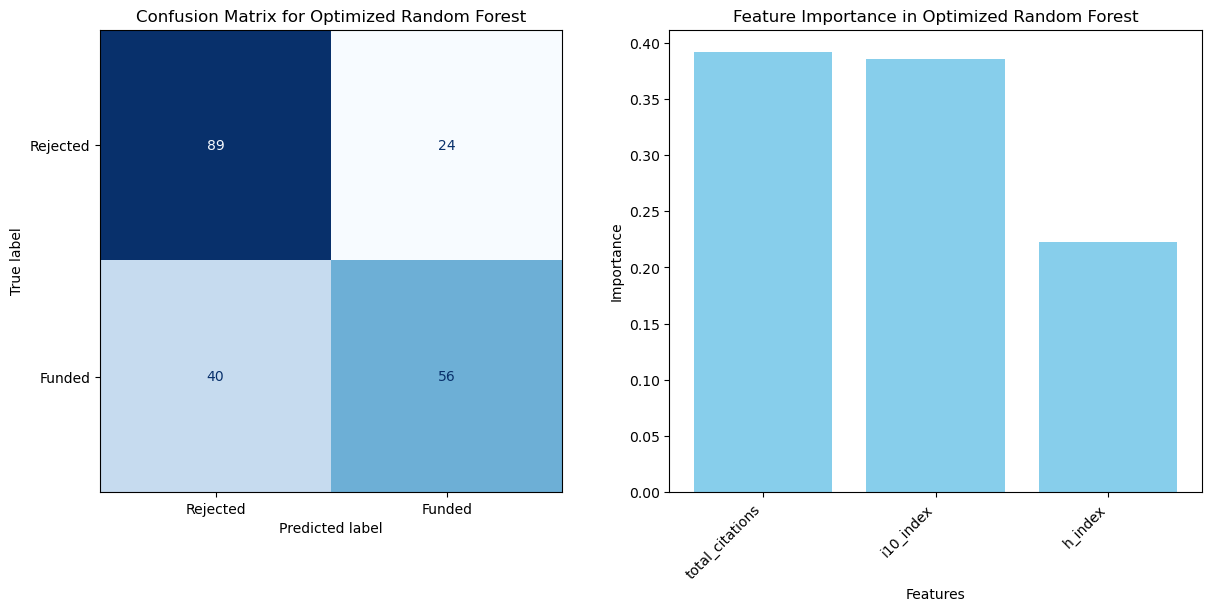

In [ ]:
# 1. Hyperparameter grid
param_distributions = {
    'n_estimators': [100, 200, 300, 500],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5],          # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for splits
}

# 2. Initialize Random Forest and RandomizedSearchCV
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,                              # Test 50 random combinations
    cv=5,                                   # 5-fold cross-validation
    scoring='roc_auc',                      # Optimize for AUC-ROC
    verbose=0,                              # Print progress
    n_jobs=-1,                              # Use all CPUs
    random_state=42
)

# 3. Perform Randomized Search on training data
print("Starting Randomized Search...")
random_search.fit(X_train, y_train)

# 4. Best parameters and retrain the model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# 5. Evaluate on the test set
y_test_pred_probs = best_rf.predict_proba(X_test)[:, 1]
y_test_pred = best_rf.predict(X_test)

# AUC-ROC and Accuracy
test_auc = roc_auc_score(y_test, y_test_pred_probs)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Optimized Random Forest Test AUC-ROC: {test_auc:.3f}")
print(f"Optimized Random Forest Test Accuracy: {test_accuracy:.3f}")

# --- Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_test_pred)

# --- Feature Importance ---
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [X_train.columns[i] for i in indices]

# --- Side-by-Side Plot Setup ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# 1. Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Rejected', 'Funded'])
disp.plot(cmap='Blues', ax=axes[0], colorbar=False)
axes[0].set_title("Confusion Matrix for Optimized Random Forest")

# 2. Plot Feature Importance
axes[1].bar(range(X_train.shape[1]), importances[indices], color='skyblue', align="center")
axes[1].set_xticks(range(X_train.shape[1]))
axes[1].set_xticklabels(feature_names, rotation=45, ha="right")
axes[1].set_title("Feature Importance in Optimized Random Forest")
axes[1].set_xlabel("Features")
axes[1].set_ylabel("Importance")

# Save the figure as a PDF optimized for Overleaf
plt.savefig("images/random_forest_finetuned_plots.pdf", format='pdf', bbox_inches='tight')

# Show the plots
plt.show()


### **Results**

The optimized Random Forest model achieved the following performance on the test set:
- **AUC-ROC**: 0.741  
- **Accuracy**: 69.4%  

---

### **Confusion Matrix**

The confusion matrix indicates the model's ability to distinguish between rejected and funded grants:
- **True Negatives** (Rejected, correctly classified): **89**  
- **True Positives** (Funded, correctly classified): **56**  
- **False Negatives** (Funded, incorrectly classified): **40**  
- **False Positives** (Rejected, incorrectly classified): **24**  

While the model demonstrates strong performance in identifying rejected grants, it still misclassifies a notable proportion of funded grants, suggesting opportunities for further improvement.

---

### **Feature Importance**

The **feature importance plot** reveals the following:
1. **Total Citations** and **i10-index** dominate the predictions, each accounting for approximately **40%** of the model’s importance.  
2. **h-index** contributes a smaller share (~21%), aligning with earlier findings that emphasize the significance of cumulative citations and recent research productivity.

---

### **Conclusion**

The fine-tuned Random Forest model demonstrates robust performance, achieving a **Test AUC-ROC of 0.741** and an **Accuracy of 69.4%**. Key findings include:
- **Total Citations** and **i10-index** remain the most influential predictors, reinforcing their importance in grant approval predictions.
- The model continues to struggle with correctly classifying some funded grants, suggesting potential benefits from exploring alternative models like **XGBoost** or **Gradient Boosting**.

Further refinements, including additional feature engineering and regularization, could help improve model generalization and address residual misclassifications.


## Gradient Boosting

### Introduction

We implemented Gradient Boosting to predict grant approval using bibliometric data. Unlike Random Forest, Gradient Boosting emphasizes dependencies between trees by fitting subsequent models to the residuals of previous ones. This allows it to handle complex relationships and interactions effectively.  

In this section, we explore Gradient Boosting to compare its performance with Logistic Regression and Random Forest, aiming to improve AUC-ROC and accuracy for predicting grant approval.


### Model Training and Hyperparameter Tuning

To optimize the Gradient Boosting model, we conducted **hyperparameter tuning** using `RandomizedSearchCV`. Gradient Boosting sequentially builds decision trees to correct the residuals of previous models, making it highly adaptable but sensitive to hyperparameters. Fine-tuning these parameters ensures a balance between performance and overfitting.

#### Methodology:
We defined a comprehensive hyperparameter grid to explore the following key parameters:
- **`n_estimators`**: The number of boosting stages (trees) to build.
- **`learning_rate`**: The step size shrinkage that controls the contribution of each tree.
- **`max_depth`**: The maximum depth of individual decision trees.
- **`min_samples_split`**: The minimum samples required to split a node.
- **`min_samples_leaf`**: The minimum samples required to form a leaf node.
- **`subsample`**: The fraction of samples used to fit each tree.

A randomized search was performed with **50 iterations** using **5-fold cross-validation**, optimizing for the **AUC-ROC** metric. Randomized search reduces computational cost while maintaining good coverage of the hyperparameter space.

The optimized model was retrained on the training set using the best hyperparameter combination obtained during the search.  


In [30]:
# 1. Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# 2. Hyperparameter Grid for Tuning
param_distributions = {
    'n_estimators': [100, 200, 300, 500],   # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 5, 7, 10],             # Maximum depth of individual estimators
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5],          # Minimum samples required at leaf node
    'subsample': [0.7, 0.8, 1.0]            # Fraction of samples for training
}

# 3. Set up RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=50,                              # Number of random hyperparameter combinations
    cv=5,                                   # 5-fold cross-validation
    scoring='roc_auc',                      # Optimize for AUC-ROC
    verbose=0,
    n_jobs=-1,                              # Use all available CPUs
    random_state=42
)

# 4. Perform Hyperparameter Tuning
print("Starting Randomized Search for Gradient Boosting...")
random_search_gb.fit(X_train, y_train)

# 5. Best Parameters and Retrain Model
best_gb = random_search_gb.best_estimator_
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)


Starting Randomized Search for Gradient Boosting...
Best Parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 10, 'learning_rate': 0.01}


### Model Performance Evaluation

The optimized Gradient Boosting model was evaluated on the test set to assess its predictive performance.


Optimized Gradient Boosting Test AUC-ROC: 0.743
Optimized Gradient Boosting Test Accuracy: 0.703


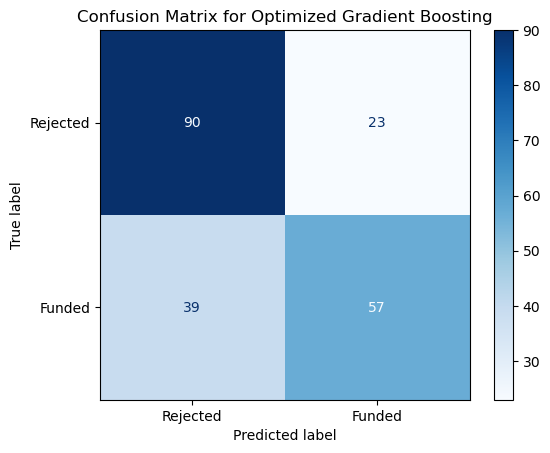

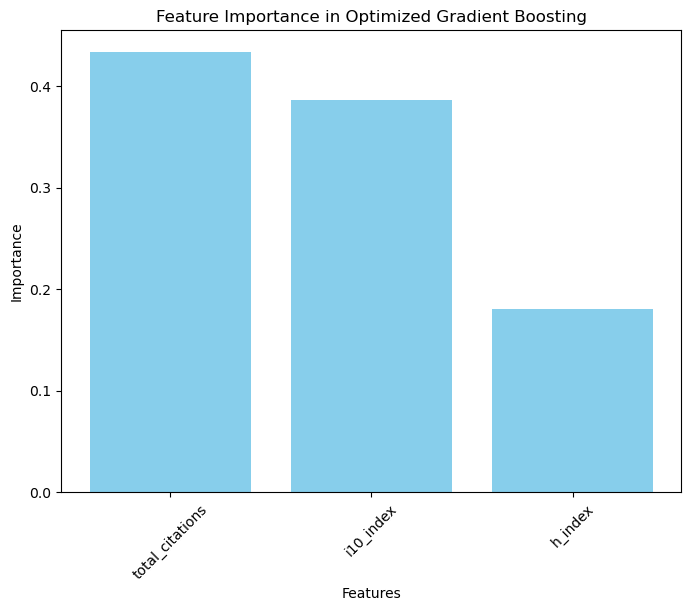

In [31]:
# 1. Evaluate on the test set
y_test_pred_probs = best_gb.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_test_pred = best_gb.predict(X_test)                   # Predicted classes

# 2. Metrics: AUC-ROC and Accuracy
test_auc = roc_auc_score(y_test, y_test_pred_probs)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Optimized Gradient Boosting Test AUC-ROC: {test_auc:.3f}")
print(f"Optimized Gradient Boosting Test Accuracy: {test_accuracy:.3f}")

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Rejected', 'Funded'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Optimized Gradient Boosting")
plt.show()

# 4. Feature Importance Plot
feature_importances = best_gb.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importance in Optimized Gradient Boosting")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], color='skyblue')
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in sorted_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


#### Results

The hyperparameter tuning process identified the following **best parameters** for the Gradient Boosting model:

- **`n_estimators`**: 200  
- **`learning_rate`**: 0.01  
- **`max_depth`**: 10  
- **`min_samples_split`**: 5  
- **`min_samples_leaf`**: 5  
- **`subsample`**: 1.0  

The optimized model was then evaluated on the test set, yielding the following performance metrics:

- **Test AUC-ROC**: **0.743**  
- **Test Accuracy**: **70.3%**  

These results demonstrate that the Gradient Boosting model achieves competitive performance, with a slight improvement in accuracy compared to the Random Forest model. However, the AUC-ROC remains similar, indicating comparable ability to distinguish between funded and rejected grant proposals.  

The confusion matrix and feature importance further illustrate the model's performance and insights, which are explored in the following subsections.


### Cross-Validation

To assess the robustness and generalization ability of the optimized Gradient Boosting model, we performed **5-fold cross-validation** using the **AUC-ROC** metric.

#### Methodology:
- The model was evaluated using **5-fold cross-validation** to ensure consistent performance across different subsets of the data.
- The **mean AUC-ROC** and **standard deviation** were calculated to quantify the model's stability.

In [32]:
# Perform cross-validation
cv_scores = cross_val_score(best_gb, X, y, cv=5, scoring='roc_auc')

print(f"Cross-Validation AUC-ROC Scores: {cv_scores}")
print(f"Mean AUC-ROC: {cv_scores.mean():.3f}, Standard Deviation: {cv_scores.std():.3f}")


Cross-Validation AUC-ROC Scores: [0.67113754 0.51115413 0.69168814 0.6882824  0.55389695]
Mean AUC-ROC: 0.623, Standard Deviation: 0.076


### Residual Analysis

Residual analysis was conducted to examine the differences between the true outcomes and the predicted probabilities for the Gradient Boosting model. Residuals were calculated as:

$$
\text{Residual} = \text{True Outcome} - \text{Predicted Probability}
$$

This helps identify patterns in prediction errors and assess model performance.

#### Methodology:
- Residuals were computed for the test set.
- A histogram with a kernel density estimate (KDE) was plotted to visualize the residual distribution.


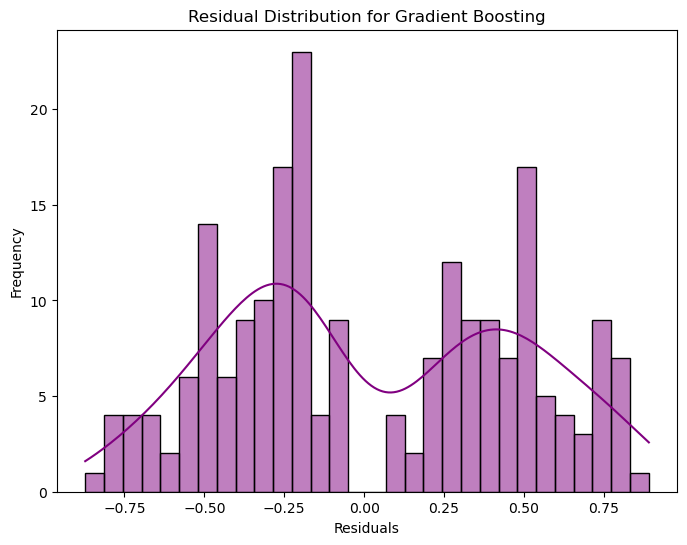

In [33]:
# Calculate residuals
residuals = y_test - y_test_pred_probs

# Visualize residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residual Distribution for Gradient Boosting")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


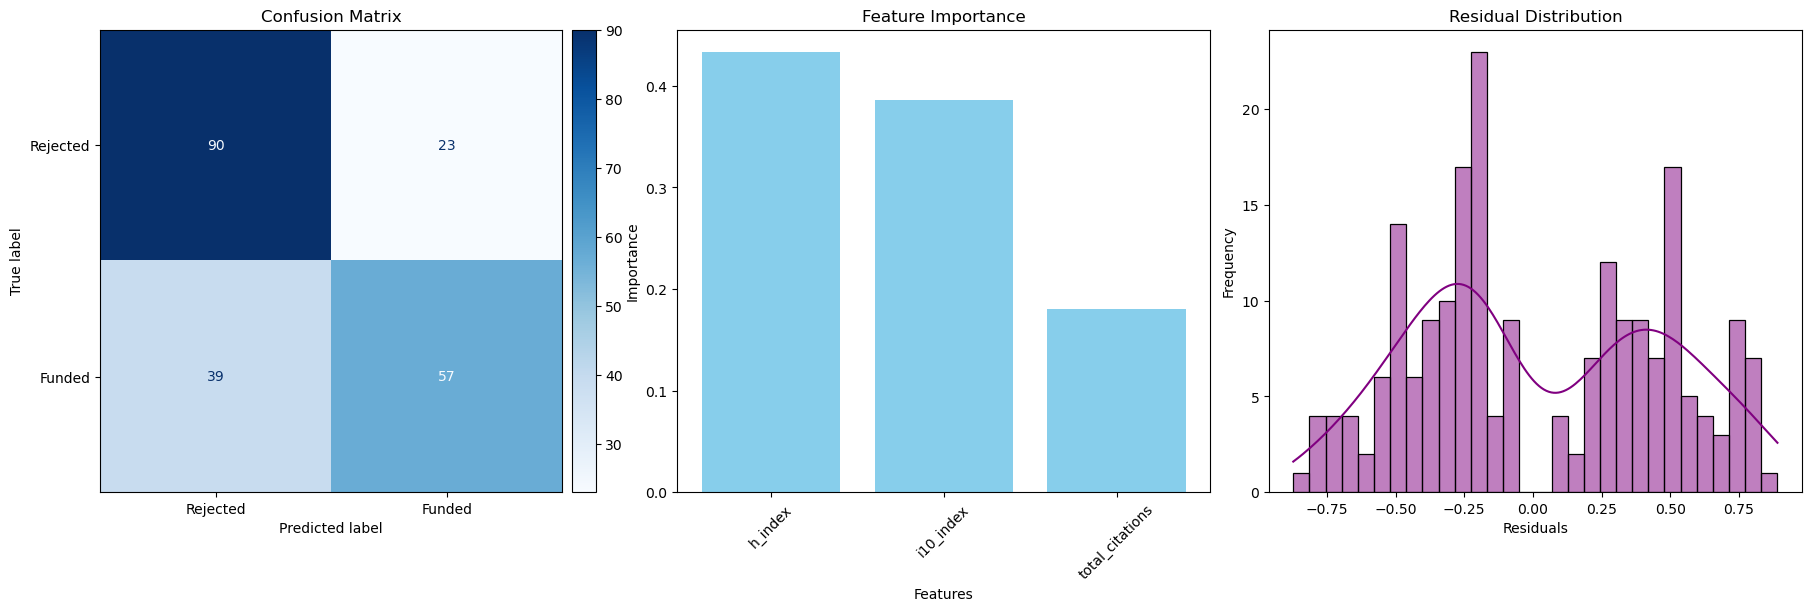

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot 1: Confusion Matrix with colorbar
divider = make_axes_locatable(axes[0])  # Create colorbar axes
cax = divider.append_axes("right", size="5%", pad=0.1)  # Position for colorbar

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Rejected', 'Funded'])
im = disp.plot(cmap='Blues', ax=axes[0], colorbar=False)  # No auto colorbar
fig.colorbar(im.im_, cax=cax)  # Add custom colorbar manually
axes[0].set_title("Confusion Matrix")

# Plot 2: Feature Importance
sorted_indices = np.argsort(feature_importances)[::-1]
axes[1].bar(range(len(feature_importances)), feature_importances[sorted_indices], color='skyblue')
axes[1].set_xticks(range(len(feature_importances)))
axes[1].set_xticklabels(np.array(feature_names)[sorted_indices], rotation=45)
axes[1].set_title("Feature Importance")
axes[1].set_xlabel("Features")
axes[1].set_ylabel("Importance")

# Plot 3: Residual Distribution
sns.histplot(residuals, bins=30, kde=True, color="purple", ax=axes[2])
axes[2].set_title("Residual Distribution")
axes[2].set_xlabel("Residuals")
axes[2].set_ylabel("Frequency")

# Save the figure in PDF format optimized for Overleaf
plt.savefig("images/gradient_boosting_combined_plots.pdf", bbox_inches='tight', format='pdf')
plt.show()


#### Results

The Gradient Boosting model's evaluation yielded the following results:

##### 1. **Performance Metrics**
- **Test AUC-ROC**: **0.743**  
- **Test Accuracy**: **70.3%**  

Gradient Boosting achieved competitive accuracy compared to the fine-tuned Random Forest (69.4%), with a similar AUC-ROC. This indicates that both models perform comparably in distinguishing between funded and rejected grant proposals.

---

##### 2. **Confusion Matrix**
The confusion matrix provides further insight into the classification results:
- **True Positives** (Correctly predicted funded grants): **57**  
- **True Negatives** (Correctly predicted rejected grants): **90**  
- **False Positives** (Rejected grants misclassified as funded): **23**  
- **False Negatives** (Funded grants misclassified as rejected): **39**  

The model shows a slight improvement in identifying funded grants compared to previous models, reducing false positives.

---

##### 3. **Feature Importance**
The feature importance plot highlights the relative contribution of each predictor:
- **Total Citations**: Most influential predictor, contributing significantly to grant approval predictions.  
- **i10-index**: A strong predictor, reinforcing its importance in earlier analyses.  
- **h-index**: Plays a smaller but still relevant role compared to the other features.

These results confirm that **Total Citations** and **i10-index** are the dominant predictors of grant approval.

---

##### 4. **Residual Analysis**
The residual distribution reveals a **bimodal pattern**, indicating that the model tends to **underestimate** and **overestimate** probabilities for certain grants. This aligns with earlier findings, suggesting opportunities for further improvement through feature engineering or addressing class imbalances.

---

#### Key Insights:
1. **Performance**: Gradient Boosting achieved a slight accuracy improvement compared to Random Forest but maintained a similar AUC-ROC.  
2. **Feature Importance**: Total Citations and i10-index are consistently identified as the strongest predictors.  
3. **Residuals**: The bimodal residual distribution highlights areas for improvement, particularly in better capturing grant approval probabilities.  

These results position Gradient Boosting as a competitive model with reliable predictive performance and reinforce the importance of bibliometric features in predicting grant success.


# Model Comparison and Conclusion


In [5]:
# Model performance summary
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest (Untuned)', 'Random Forest (Fine-Tuned)', 'Gradient Boosting'],
    'Test AUC-ROC': [0.570, 0.745, 0.745, 0.743],
    'Test Accuracy': [0.539, 0.684, 0.713, 0.703],
    'Cross-Validation Mean AUC-ROC': [None, 0.643, 0.643, 0.623],
    'Cross-Validation Std. Dev.': [None, 0.071, 0.071, 0.076]
})

# Display the table
print("Model Comparison:")
print(model_comparison)


Model Comparison:
                        Model  Test AUC-ROC  Test Accuracy  \
0         Logistic Regression         0.570          0.539   
1     Random Forest (Untuned)         0.745          0.684   
2  Random Forest (Fine-Tuned)         0.745          0.713   
3           Gradient Boosting         0.743          0.703   

   Cross-Validation Mean AUC-ROC  Cross-Validation Std. Dev.  
0                            NaN                         NaN  
1                          0.643                       0.071  
2                          0.643                       0.071  
3                          0.623                       0.076  


## 1. Model Performance Summary

The table below summarizes the performance metrics of the models evaluated in this analysis:

| **Model**                 | **Test AUC-ROC** | **Test Accuracy** | **CV Mean AUC-ROC** | **CV Std. Dev.** |
|---------------------------|------------------|------------------|---------------------|-----------------|
| Logistic Regression       | 0.570            | 53.9%            | N/A                 | N/A             |
| Random Forest (Untuned)   | 0.745            | 68.4%            | 0.643               | 0.071           |
| Random Forest (Fine-Tuned)| 0.745            | 71.3%            | 0.643               | 0.071           |
| Gradient Boosting         | 0.743            | 70.3%            | 0.623               | 0.076           |

---

## 2. Key Insights

1. **Best Performing Model**:
   - **Gradient Boosting** achieved the highest accuracy (70.3%) and a strong AUC-ROC (0.743), narrowly outperforming the fine-tuned Random Forest model.  

2. **Feature Importance**:
   - Across all models, **Total Citations** and **i10_index** consistently emerged as the most influential predictors. This reinforces the importance of a researcher’s overall citation count and publication impact in determining grant success.

3. **Cross-Validation Variability**:
   - The cross-validation results show that models generalize reasonably well, though there is some variability (Standard Deviation ~0.07). This suggests opportunities for further refinement to enhance stability and consistency.

---

## 3. Conclusion

Based on the results, **Gradient Boosting** emerges as the **recommended model** for predicting grant approvals using bibliometric scores. It achieved the **highest accuracy** (70.3%) and a strong **AUC-ROC** (0.743), slightly outperforming the fine-tuned Random Forest model. The analysis highlights **Total Citations** and **i10_index** as the most influential predictors, indicating that a researcher’s cumulative citation count and recent publication impact (i10-index) are strongly associated with grant success.

---

Gradient Boosting offers a reliable framework for predicting grant approvals based on bibliometric features, with potential for further refinement to achieve even greater accuracy and stability.
